In [1]:
import sys,os

import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel



In [2]:
import pickle 
simu_data = pickle.load(open('/home/ubuntu/sequoia/datasets/simu_data.pkl','rb'))

In [3]:
simu_data['y'].max(),simu_data['y'].min(),simu_data['y'].mean()

(1073480.0, 1066.17004395, 69312.50110372987)

In [4]:
simu_data['y'] = simu_data['y']/100

In [5]:
simu_data['y'].max(),simu_data['y'].min(),simu_data['y'].mean()

(10734.8, 10.6617004395, 693.1250110372986)

In [6]:
stan_file = os.path.join('stanfiles','gp_gabriuma_2d.stan')
model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())

CmdStanModel: name=gp_gabriuma_2d
	 stan_file=/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [7]:
opt = model.optimize(data=simu_data)

opt.stan_variable('rho')

01:38:36 - cmdstanpy - INFO - Chain [1] start processing
01:38:36 - cmdstanpy - INFO - Chain [1] done processing


array([0.530607, 1.29612 ])

In [8]:

fit = model.sample(data=simu_data,iter_warmup=500, iter_sampling=1000,
                                  chains=4, parallel_chains=4)


01:38:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:39:00 - cmdstanpy - INFO - CmdStan done processing.
01:39:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: Exception: gp_exp_quad_cov: length_scale is 0, but must be positive! (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 76, column 2 to column 70) (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 108, column 1 to column 63)
	Exception: Exception: gp_exp_quad_cov: length_scale is 0, but must be positive! (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 76, column 2 to column 70) (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 108, column 1 to column 63)
	Exception: Exception: gp_exp_quad_cov: length_scale is 0, but must be positive! (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 76, column 2 to column 70) (in '/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d.stan', line 108, column 1 to column 63)
	Exception: Exception: gp_exp_quad_cov: length_scale is 0, but must be positive! (in '/home/ub

In [10]:
simu_data['x_grid'].shape

(352, 2)

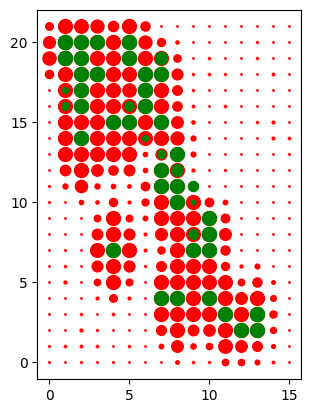

In [11]:
for i,x in enumerate(simu_data['x_grid']):
    plt.scatter(x[0],x[1], s=np.clip(np.mean(fit.stan_variable('f_grid'),0)[i],1,100), color = 'red')
for i,x in enumerate(simu_data['x']):
    plt.scatter(x[0],x[1], s=np.clip(simu_data['y'][i],1,100), color = 'green')
plt.gca().set_aspect('equal')

In [13]:
img = np.zeros(((np.max(simu_data['x_grid'],0)- np.min(simu_data['x_grid'],0))+1).astype(int))

In [14]:
img.shape

(16, 22)

In [16]:
for i,x in enumerate(simu_data['x_grid']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    img[p[0],p[1]] = np.mean(fit.stan_variable('f_grid'),0)[i]

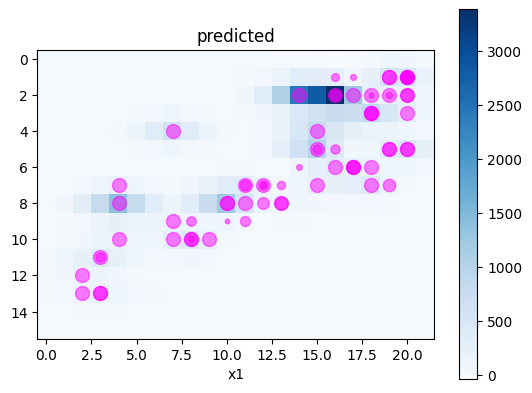

In [20]:
plt.imshow(img, cmap = "Blues")
plt.xlabel('x2')
plt.xlabel('x1')
plt.title('predicted')
plt.colorbar()
for i,x in enumerate(simu_data['x']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    plt.scatter(p[1],p[0], s=np.clip(simu_data['y'][i],1,100), alpha = 0.5,color = 'magenta')

# uncertainty

In [23]:
img_std = np.zeros(((np.max(simu_data['x_grid'],0)- np.min(simu_data['x_grid'],0))+1).astype(int))

In [25]:
for i,x in enumerate(simu_data['x_grid']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)-1
    img_std[p[0],p[1]] = np.std(fit.stan_variable('f_grid'),0)[i]

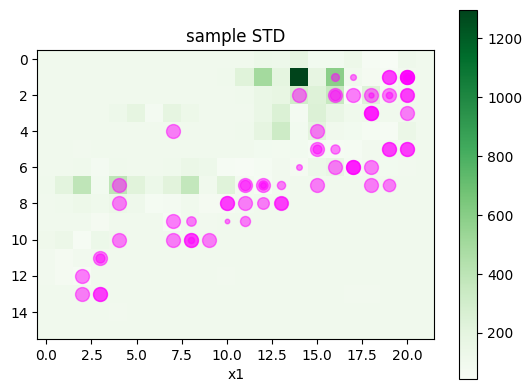

In [27]:
plt.imshow(img_std, cmap = "Greens")
plt.xlabel('x2')
plt.xlabel('x1')
plt.title('sample STD')
plt.colorbar()
for i,x in enumerate(simu_data['x']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    plt.scatter(p[1],p[0], s=np.clip(simu_data['y'][i],1,100), alpha = 0.5,color = 'magenta')